In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
def get_finance_df (start_year=2019,years_of_service=20,joining_salary=105000,tax_rate=30,
                   monthly_expense=3000,expense_rate=2,growth_rate=8,cash_retain_perc=60):
    year = np.arange(start_year,start_year + years_of_service)
    
    hike_perc = 2*np.ones(len(year))
    hike_perc[2::3] = 4
    hike_perc[0] = 0
    
    yearly_income_pre_taxed = np.zeros(len(year))
    yearly_income_pre_taxed[0] = joining_salary
    
    for x in np.arange(1,len(year)):
        yearly_income_pre_taxed[x] = yearly_income_pre_taxed[x-1]*(1 + hike_perc[x]/100)
    
    df = pd.DataFrame({'year': year , 'yearly_income_pre_taxed' : yearly_income_pre_taxed , 'hike_perc' : hike_perc})
    
    df['yearly_income_post_taxed'] = df['yearly_income_pre_taxed'] * (1 - tax_rate/100)
    
    yearly_expenditure = np.zeros(len(year))
    yearly_expenditure[0] = monthly_expense * 12
    
    for x in np.arange(1,len(year)):
        yearly_expenditure[x] = yearly_expenditure[x-1]*(1 + expense_rate/100)
        
    df['yearly_expenditure'] = yearly_expenditure
    
    df['yearly_savings'] = df['yearly_income_post_taxed'] - df['yearly_expenditure']
    
    df['cash_retained'] = df['yearly_savings'] * cash_retain_perc / 100
    
    df['cash_invested'] = df['yearly_savings'] - df['cash_retained']
    
    df['ROI'] = df['cash_invested'] * ((1 + growth_rate / 100)**years_of_service)
    
    return df.astype(int)

## Constants
- TODO : expalin each constant in detail

In [61]:
start_year = 2019
joining_salary = 105000
tax_rate = 30
monthly_expense = 3000
expense_rate = 2
growth_rate = 8
years_of_service = 20
cash_retain_perc = 60

In [62]:
df = get_finance_df()
df

,year,yearly_income_pre_taxed,hike_perc,yearly_income_post_taxed,yearly_expenditure,yearly_savings,cash_retained,cash_invested,ROI
0,2019,105000,0,73500,36000,37500,22500,15000,69914
1,2020,107100,2,74970,36720,38250,22950,15300,71312
2,2021,111384,4,77968,37454,40514,24308,16205,75534
3,2022,113611,2,79528,38203,41324,24794,16529,77045
4,2023,115883,2,81118,38967,42151,25290,16860,78585
5,2024,120519,4,84363,39746,44616,26769,17846,83182
6,2025,122929,2,86050,40541,45508,27305,18203,84846
7,2026,125388,2,87771,41352,46419,27851,18567,86542
8,2027,130403,4,91282,42179,49102,29461,19641,91546
9,2028,133011,2,93108,43023,50084,30050,20033,93377


Text(0,0.5,'Return on Investment')

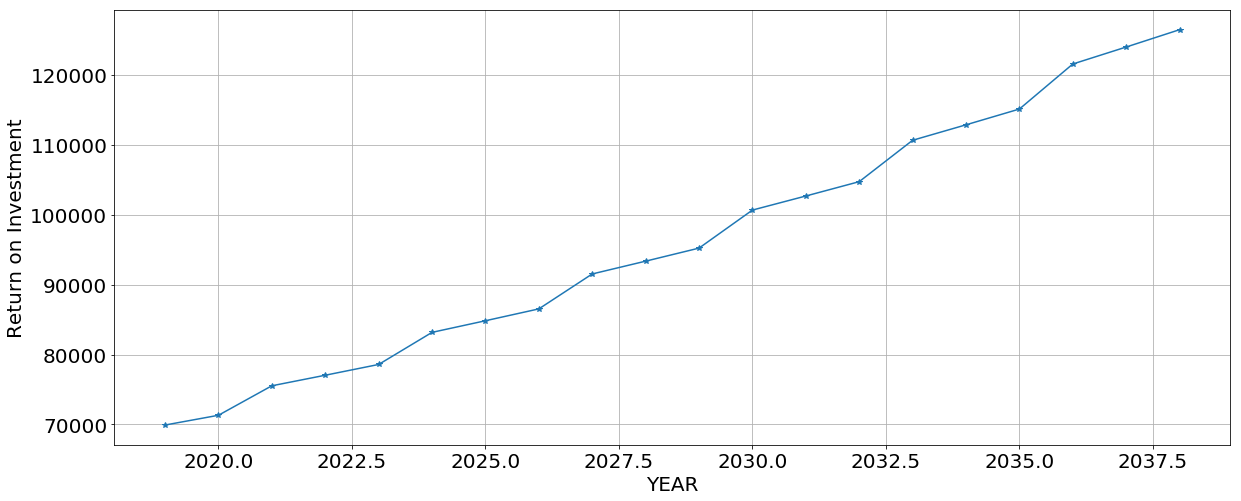

In [82]:
plt.rc('font', size=20) 
plt.figure(figsize=[20,8])
plt.plot(df.year,df.ROI,'*-')
plt.grid()
plt.xlabel('YEAR')
plt.ylabel('Return on Investment')

In [78]:
ROI = np.array([get_finance_df(growth_rate=r).sum()['ROI'] for r in np.arange(5,12)])
ROI

array([1096497, 1325378, 1599186, 1926188, 2316082, 2780211, 3331839])

Text(0,0.5,'Return on Investment (Millions)')

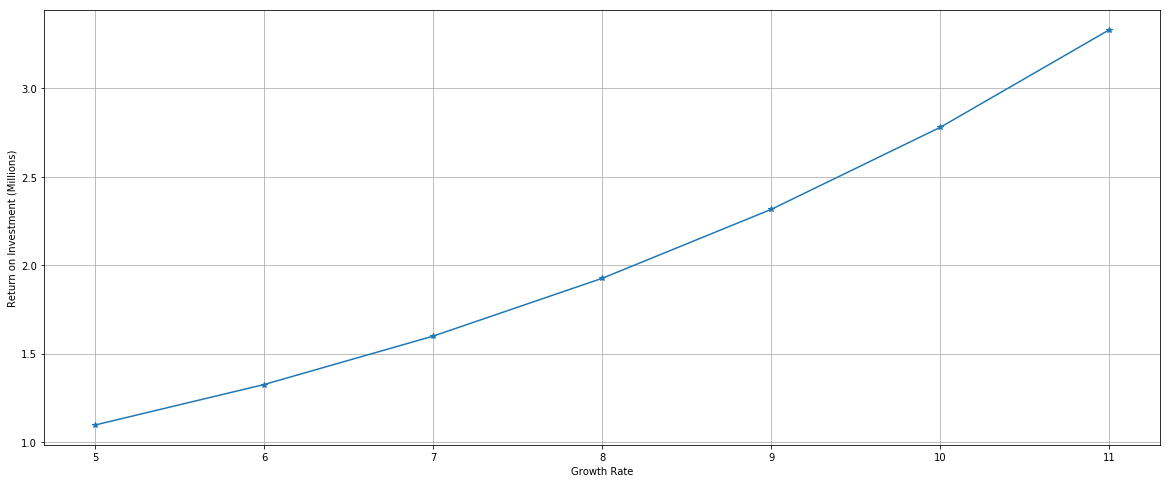

In [80]:
plt.figure(figsize=[20,8])
plt.plot(np.arange(5,12),ROI/1e6,'*-')
plt.grid()
plt.xlabel('Growth Rate')
plt.ylabel('Return on Investment (Millions)')